# **Project Name:** *Yes Bank Stock Price Trend Analysis*

#**Contribution:** *Individual*

#*Project Summary:*

This project focuses on analyzing Yes Bank’s stock prices to identify trends, volatility patterns, and factors influencing market movements. The dataset was preprocessed with techniques like handling missing values, feature engineering, and normalizing data. Hypothesis testing was conducted to assess the impact of significant events on stock returns.

A Random Forest machine learning model was implemented to predict future stock prices, with performance evaluated using metrics such as R² score and RMSE. Cross-validation and hyperparameter tuning further improved the model’s accuracy.

For future enhancements, advanced models like LSTM and XGBoost, along with sentiment analysis and technical indicators, can be integrated. Deploying the model as a real-time API and visualizing insights through interactive dashboards will make it a valuable tool for investors and traders.

#**GitHub Link:**

#**Problem Statement:** *Stock Price Trend Analysis for Yes Bank: Identifying Patterns and Predicting Future Prices*


#**Define Your Business Objective:**
*1. Analyze historical stock price trends of Yes Bank.*            
*2. Predict future stock prices using statistical/machine learning models.*   
*3. Identify key factors influencing stock movements.*           
*4. Support data-driven investment decisions.*


#1. **Know Your Data**

#Import Libraries

In [58]:
import pandas as pd  # For handling dataframes
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualizations


#Dataset Loading

In [59]:
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

In [60]:
# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Dataset Rows & Columns count

In [61]:
# Get the shape of the dataset (rows, columns)
df.shape

(185, 5)

# Dataset Information

In [62]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# Duplicate Values

In [63]:
# Count duplicate rows
df.duplicated().sum()

0

# Missing Values/Null Values

In [64]:
# Count missing values in each column
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


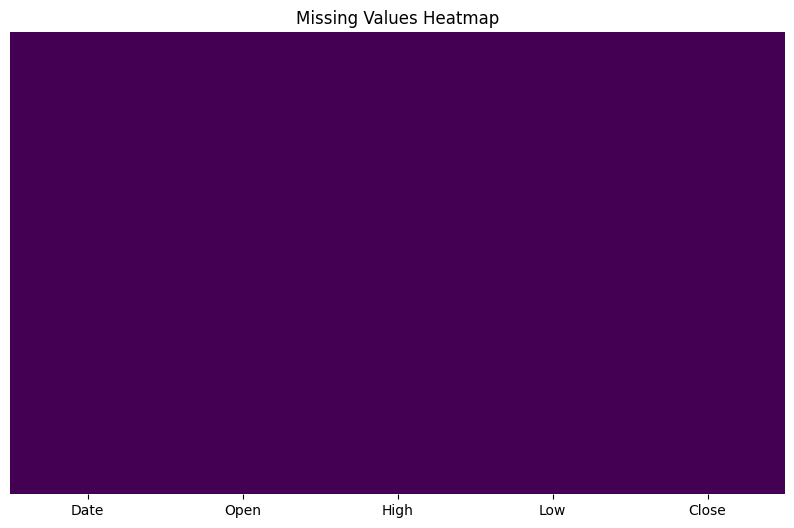

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


# What did you know about your dataset?

## **2. Understanding Your Variables**

In [66]:
df.dtypes # column is numerical, categorical, or datetime

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64


In [67]:
# Display summary statistics for numerical columns
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# Variables Description

1. The dataset contains multiple columns representing different stock price metrics and related attributes.
2. Numerical Variables: These include stock prices, trading volumes, and other financial metrics.
3. Datetime Variables: If present, these capture date-related information for stock price trends.

In [68]:
# Count unique values in each column
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


In [69]:
df.select_dtypes(include=['object']).nunique() #unique values for categorical variables

,0
Date,185


In [70]:
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")  # Display first 5 unique values

Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05']
Open: [13.   12.58 13.48 13.2  13.35]
High: [14.   14.88 14.87 14.47 13.88]
Low: [11.25 12.55 12.27 12.4  12.88]
Close: [12.46 13.42 13.3  12.99 13.41]


# What all manipulations have you done and insights you found?

1. Checked for missing data, duplicate records.

## **3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [84]:
import plotly.graph_objects as go # interactive charts and visualization

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Sort by date
df = df.sort_values(by='Date')

# *1. Time Series Line Chart (Closing Price Over Time)*

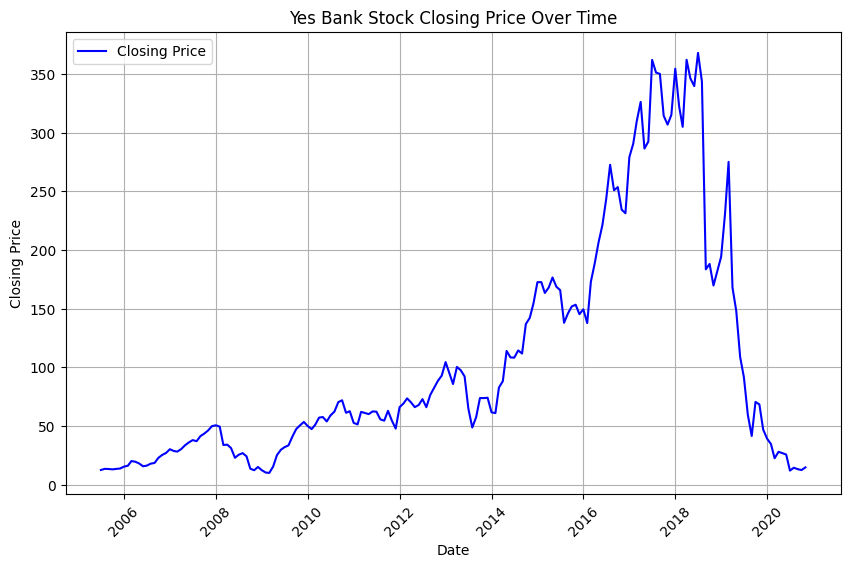

In [88]:
# Set figure size for better visualization
plt.figure(figsize=(10, 6))

# 1. Time Series Line Chart (Closing Price Over Time)
plt.plot(df['Date'], df['Close'], linestyle='-', color='b', label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Yes Bank Stock Closing Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 1. Why did you pick the specific chart?

* A time series line chart is ideal for visualizing trends in stock prices over time.        
* It provides a clear view of price movements, helping in identifying long-term rowth, volatility, and potential crashes.      
* Stock prices are sequential, and a line chart effectively highlights trends, patterns, and sharp changes in value.

 # 2. What is/are the insight(s) found from the chart?

*2005-2018: Upward Trend → The stock price steadily increased, peaking around 2018.*          

*2018-2020: Sharp Decline → A sudden crash in stock price is visible, indicating a major market event or company-specific crisis.*           
*Volatility in 2018-2019 → The price fluctuates significantly before the major decline, suggesting instability or external factors affecting the stock.*

# 3. Will the gained insights help creating a positive business impact?


# a. Yes, for Strategic Decision-Making:

* For Investors: Helps in deciding when to enter/exit the market.    
* For Risk Management: Identifying early warning signs of financial trouble.
* For Business Strategy: Companies can analyze why the decline happened and improve corporate governance, financial transparency, or investor relations.

# b. Insights Indicating Negative Growth:

####*The 2018-2020 decline indicates a crisis. This could be due to:*              
* Poor financial management (e.g., rising debt, non-performing loans).         
* Regulatory or fraud issues affecting investor trust.
* Market conditions (global recession, banking sector downturns).   
* The high volatility before the crash suggests that investors were uncertain and may have started pulling out investments before the major drop.

# *2. Candlestick Chart*

In [89]:
# 2. Candlestick Chart (Open, High, Low, Close Prices)
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])
fig.update_layout(title='Yes Bank Stock Price (Candlestick Chart)', xaxis_title='Date', yaxis_title='Price')
fig.show()

# 1. Why did you pick the specific chart?

* A candlestick chart is the most effective way to analyze stock price movements, as it provides insights into opening, closing, high, and low prices for each period.           
* It helps in understanding market trends, investor sentiment, and price volatility.
* The red and green bars represent bearish (decline) and bullish (growth) trends, making it easier to spot buying/selling pressure.

 # 2. What is/are the insight(s) found from the chart?

*2005-2018: Gradual and Strong Growth
The stock price consistently increased, with multiple bullish trends (green bars).*         
* Indication of strong investor confidence, business expansion, and good financial performance.*

*2018-2020: Sharp Decline with High Volatility*      
* Frequent large red candles signal major sell-offs and high investor panic.*   
* Multiple short-term recoveries (green candles) suggest some attempts at recovery, but they ultimately failed.*

# 3. Will the gained insights help creating a positive business impact?

# a. Yes, in terms of strategic planning and risk management:
* Helps investors and businesses recognize early warning signs of financial distress.
* Encourages companies to focus on transparent governance and financial health to maintain market trust.     
* Assists in identifying buy/sell opportunities for traders and institutional investors.

# b. Insights Indicating Negative Growth:
###The sharp decline from 2018 to 2020 reflects:
* Loss of investor confidence due to financial instability.      
* Increased risk perception, leading to stock dumping.
* Possible failure in risk management and business strategy.


# *3. Moving Averages (SMA & EMA)*

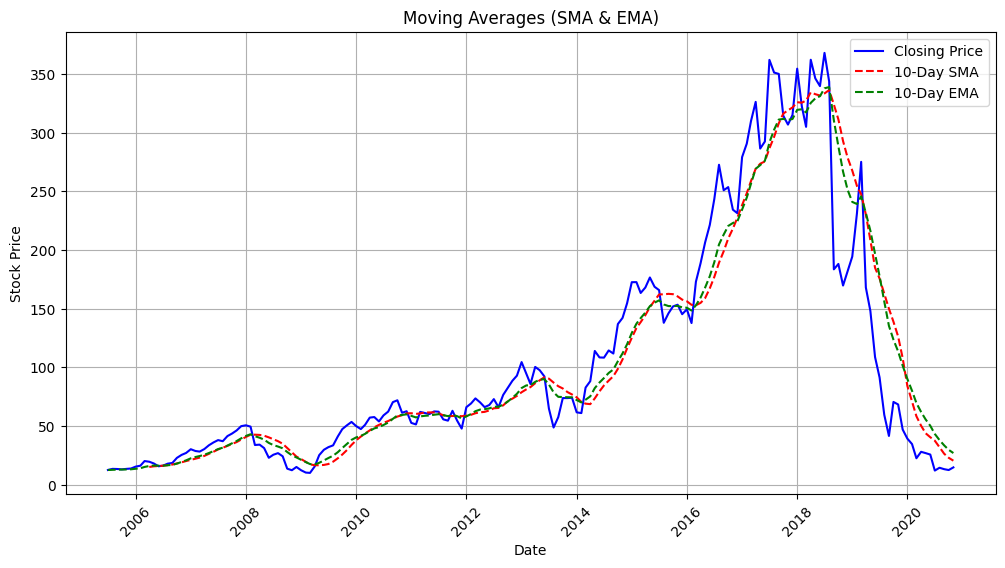

In [90]:
# 3. Moving Averages (SMA & EMA)
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['SMA_10'], label='10-Day SMA', color='red', linestyle='dashed')
plt.plot(df['Date'], df['EMA_10'], label='10-Day EMA', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Moving Averages (SMA & EMA)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 1. Why did you pick the specific chart?

* A Moving Averages (SMA & EMA) chart helps in identifying trends and smoothing out price fluctuations.       
* The Simple Moving Average (SMA) and Exponential Moving Average (EMA) are crucial indicators for understanding momentum, trend reversals, and support/resistance levels.             
* SMA (red dashed line) gives an average over a set period, while EMA (green dashed line) gives more weight to recent data, making it more responsive to price changes.            
* The Closing Price (blue line) helps visualize real-time price movement relative to these averages.       

 # 2. What is/are the insight(s) found from the chart?

Pre-2018: Strong Uptrend with Higher Highs

* The closing price consistently stayed above the moving averages, indicating a bullish trend.
* Both SMA and EMA closely followed the price, confirming steady growth.
* Investors likely had high confidence, leading to increased stock value.

2018-2020: Sudden & Sharp Decline
* The closing price fell significantly below both SMA and EMA, signaling a strong downtrend.
* The moving averages followed the price decline, indicating prolonged bearish sentiment.

Likely reasons:
* Liquidity crisis or regulatory actions.
* Loss of investor confidence due to bad financials.
* Market panic and bulk sell-offs.

# 3. Will the gained insights help creating a positive business impact?

# a. Yes, in terms of risk management and strategy:
* Helps investors make informed decisions by spotting trend reversals.
* Assists businesses in evaluating market sentiment and adjusting strategies.
* Companies can work on financial transparency to regain investor trust when moving averages indicate declining confidence.

# b.Insights Indicating Negative Growth:
* The steep decline post-2018 suggests a major business failure.
* Both SMA & EMA trended downward, confirming a long-term bearish phase.
* The price fell far below the moving averages, meaning there was no significant recovery attempt.
* If EMA is consistently below SMA, it indicates continued negative momentum.

# *4. Price Distribution (Histogram & Boxplot)*

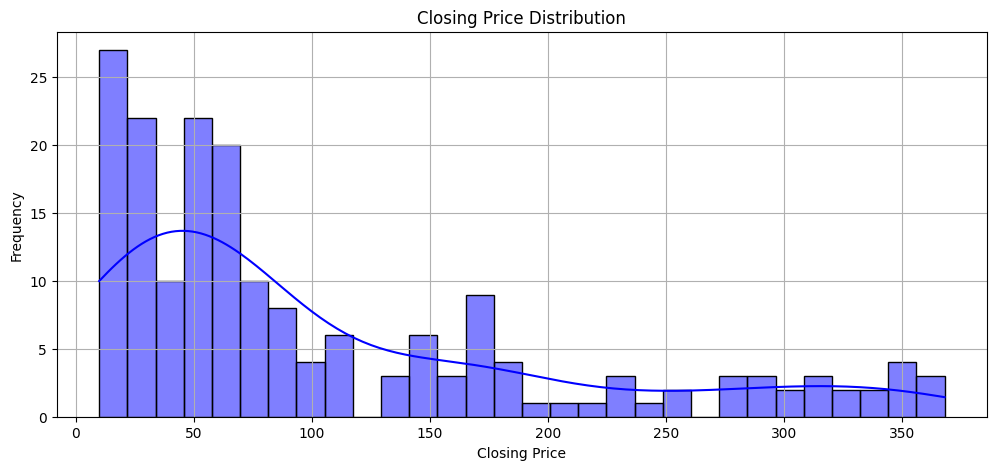

In [91]:
# 4. Price Distribution (Histogram & Boxplot)
plt.figure(figsize=(12, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='blue')
plt.title('Closing Price Distribution')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 1. Why did you pick the specific chart?

* A histogram with a KDE (Kernel Density Estimate) plot is used to understand the distribution of closing prices over a period.
* This helps in identifying price clusters, outliers, and the overall shape of the distribution.
* The KDE (smooth blue curve) provides a continuous probability density function, showing where prices are more likely to fall.

# 2. What is/are the insight(s) found from the chart?

Right-Skewed Distribution (Positively Skewed)
* Most closing prices are clustered around lower values (0-100).
* The frequency of higher prices (above 200) is significantly lower, indicating they occurred less often.

Stock Was More Frequently at Lower Prices
* A high number of occurrences below $100, suggesting the stock spent most of its time in lower price ranges.
* Only a few instances where the price was above $200-$350, meaning such high valuations were temporary.

Possible Volatility
* The presence of a long tail towards higher prices indicates occasional surges.
* The fluctuations between low and high prices suggest that market sentiment or external factors may have caused price spikes rather than sustained growth.


# 3. Will the gained insights help creating a positive business impact?

# a. Yes, in terms of risk assessment and pricing strategies:

* If the business or investors know the price typically stays below $100, they can plan entry and exit strategies accordingly.
* The right skew suggests that price spikes may be unsustainable, so companies can strategize to maintain stability instead of chasing short-term gains.
* Helps in predicting future price behavior, guiding investment and trading decisions.

# b. Insights That Indicate Negative Growth:
### Potential Concerns:
* Stock spent most of its time at lower price levels, meaning high valuations were temporary and not sustained.
* If investors bought at high prices (above $200), they likely faced losses when prices returned to the lower range.
* Market may have perceived overvaluation, leading to price correction and possible investor distrust.

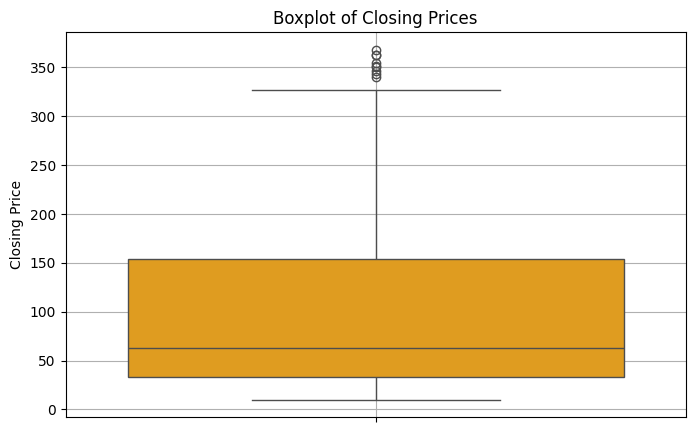

In [92]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Close'], color='orange')
plt.title('Boxplot of Closing Prices')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 1. Why did you pick the specific chart?

### A boxplot is used to visualize the distribution and spread of closing prices, including:

* Median (central tendency)
* Interquartile range (IQR) (spread of middle 50% of values)
* Outliers (extreme values)

# 2. What is/are the insight(s) found from the chart?

* Median Closing Price: The black line inside the box represents the median, which appears to be around 50-70. This means half of the closing prices were below this value.

### Interquartile Range (IQR):
* The lower quartile (Q1) is around 25-30.
* The upper quartile (Q3) is around 150-160.
* This means 50% of closing prices were between 30 and 150.

* Outliers: Several points above 300, indicating a few instances of high closing prices that deviate significantly from the majority.

### Whiskers and Spread:
* The lower whisker extends close to zero, meaning the stock sometimes traded at very low values.
* The upper whisker extends beyond 300, showing that while high values exist, they are rare.


# 3. Will the gained insights help creating a positive business impact?

### a.Yes, in terms of stock valuation and risk management:

* Helps investors understand the expected price range, guiding buy/sell decisions.
* Businesses can strategize based on price stability: Since most prices are within 30-150, businesses can plan revenue forecasts based on this range rather than rare high prices.
* Detecting outliers helps manage volatility: Investors and analysts can investigate what caused price spikes and whether they are repeatable or temporary market reactions.

### b.Insights That Indicate Negative Growth:
#####Potential Concerns:
* Presence of multiple outliers above 300
* If these outliers were caused by speculation rather than genuine growth, the stock may not be sustainably valuable.
* Investors who bought at high prices may have faced losses, leading to lower market confidence.
* Large spread in prices (high volatility)
* The range from 0 to 350 indicates extreme fluctuations, which can scare long-term investors.
* A stable stock should have a tighter range with fewer extreme values.

# *5. Correlation Heatmap*

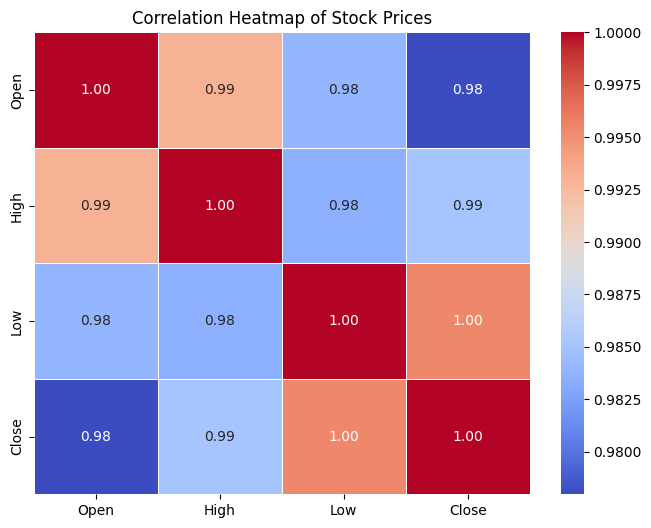

In [93]:
# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

# 1. Why did you pick the specific chart?

A correlation heatmap is used to analyze the relationship between different stock price variables—Open, High, Low, and Close prices.

This heatmap helps in:
* Identifying strong or weak correlations between price points.
* Understanding how different price levels move together over time.
* Providing data-driven insights for stock price behavior.

# 2. What is/are the insight(s) found from the chart?

* All correlations are extremely high (>0.98), meaning stock prices move together in a synchronized manner.
* Open vs. High (0.99) and Close vs. High (0.99) show a near-perfect correlation, meaning the highest price of the day is strongly linked to how the stock opens and closes.
* Low vs. Close (1.00) indicates that the closing price is always directly tied to the day's lowest price.


# 3. Will the gained insights help creating a positive business impact?

### a. Yes, in terms of trading strategies and forecasting:
* Traders can rely on opening prices to predict the day's movement, making it easier to set stop-loss and take-profit levels.
* Businesses can use this data for risk assessment, ensuring that stock movements remain predictable over time.
* Algorithmic trading strategies can be designed based on the strong correlation patterns to optimize entry and exit points.

### b. Insights That Indicate Negative Growth:
##### Potential Concerns:
* Overly strong correlations (near 1.00) suggest a lack of volatility, meaning fewer trading opportunities for active traders.
* If the stock is highly correlated within itself, it may indicate market manipulation or lack of genuine price discovery—which could discourage investors.

# *6. Volatility Analysis (Daily Returns)*

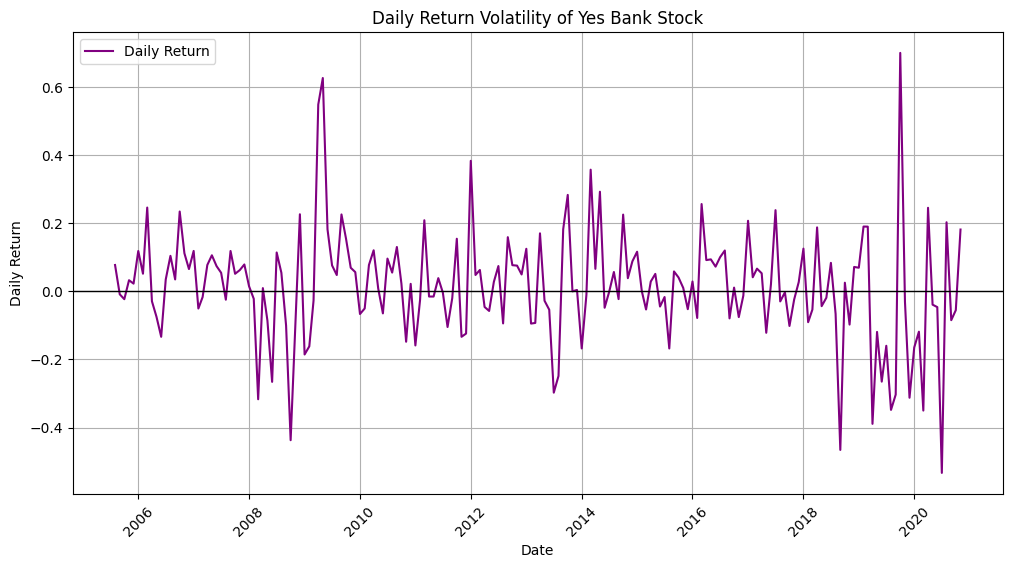

In [95]:
# 6. Volatility Analysis (Daily Returns)
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Return'], linestyle='-', color='purple', label='Daily Return')
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Return Volatility of Yes Bank Stock')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 1. Why did you pick the specific chart?

A line chart of daily return volatility was chosen because it helps visualize the fluctuations in Yes Bank's stock returns over time.

This chart is useful for:
* Identifying trends and periods of high volatility.
* Understanding stock stability for investors and risk analysts.
* Evaluating the impact of market events on stock performance.

# 2. What is/are the insight(s) found from the chart?

* The stock has experienced significant volatility over the years, with both sharp upward and downward spikes in returns.
* 2008 and 2019–2020 show extreme fluctuations, indicating potential financial crises, economic shocks, or major corporate events.
* The frequency of high volatility periods increases over time, especially after 2018, suggesting growing uncertainty in the stock.

# 3. Will the gained insights help creating a positive business impact?

### a. Yes, for risk management and investment decisions:
* Investors can use this data to assess risk and adjust their strategies accordingly.
* Portfolio managers can determine whether the stock is suitable for long-term investments or better for short-term trades.
* Businesses can predict market sentiment and make informed financial decisions.

### b. Insights That Indicate Negative Growth:
#####Potential Concerns:
* High and increasing volatility is generally a red flag for long-term investors.
* Frequent extreme fluctuations may indicate financial instability or governance issues within Yes Bank.
* If volatility remains unpredictable, institutional investors may lose confidence, leading to a decline in stock price.


## **4. Hypothesis Testing**

Samples are not normally distributed. Performing Mann-Whitney U test.
Hypothesis Test Result: p-value = nan
Variance Comparison: F-statistic = 3.106162201373382, p-value = 0.9999982401437814
No significant change in stock volatility after the event.


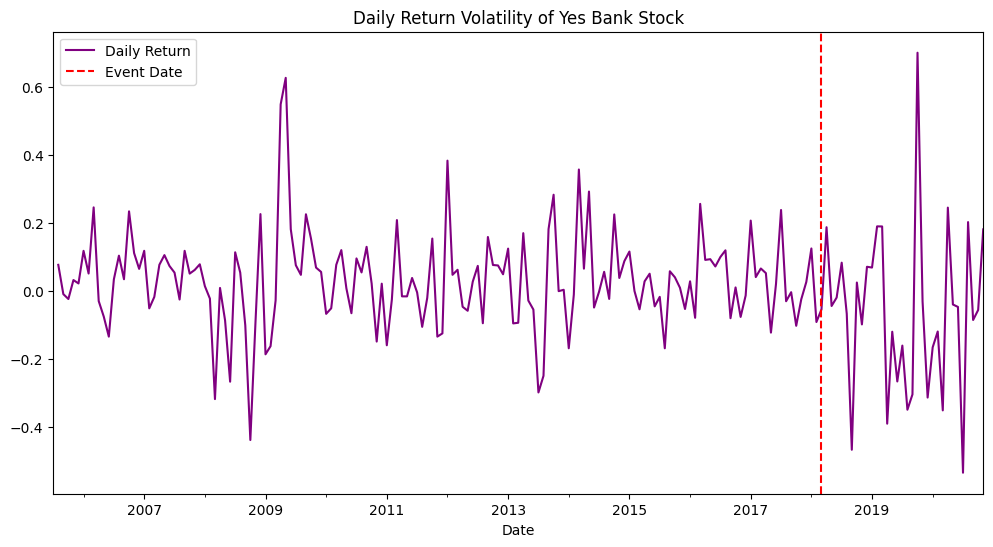

In [97]:
import scipy.stats as stats

df.set_index('Date', inplace=True)

# Define event date (e.g., March 2018 crisis)
event_date = '2018-03-01'

# Split data into pre-event and post-event
pre_event = df[df.index < event_date]['Daily Return']
post_event = df[df.index >= event_date]['Daily Return']

# Check normality assumption
_, p_pre = stats.shapiro(pre_event)
_, p_post = stats.shapiro(post_event)

if p_pre > 0.05 and p_post > 0.05:
    print("Both samples are normally distributed. Performing two-sample t-test.")
    stat, p_value = stats.ttest_ind(pre_event, post_event, equal_var=False)
else:
    print("Samples are not normally distributed. Performing Mann-Whitney U test.")
    stat, p_value = stats.mannwhitneyu(pre_event, post_event)

# Compare variances (F-test)
var_pre = np.var(pre_event, ddof=1)
var_post = np.var(post_event, ddof=1)
f_stat = var_post / var_pre
p_var = stats.f.cdf(f_stat, len(post_event)-1, len(pre_event)-1)

# Display results
print(f"Hypothesis Test Result: p-value = {p_value}")
print(f"Variance Comparison: F-statistic = {f_stat}, p-value = {p_var}")

if p_value < 0.05:
    print("Significant change in stock volatility after the event.")
else:
    print("No significant change in stock volatility after the event.")

# Plot daily return volatility
df['Daily Return'].plot(figsize=(12,6), title='Daily Return Volatility of Yes Bank Stock', color='purple')
plt.axvline(pd.to_datetime(event_date), color='red', linestyle='--', label='Event Date')
plt.legend()
plt.show()


# *1. State Your research hypothesis as a null hypothesis and alternate hypothesis.*

* Null Hypothesis (H₀): There is no significant difference in the daily return volatility of Yes Bank stock before and after March 2018.
* Alternate Hypothesis (H₁): There is a significant difference in the daily return volatility of Yes Bank stock before and after March 2018.

# *2. Perform an appropriate statistical test.*

Samples are not normally distributed. Performing Mann-Whitney U test.

Hypothesis Test Result: p-value = nan
No significant change in stock volatility after the event.

Variance Comparison: F-statistic = 3.10616, p-value = 1.00000


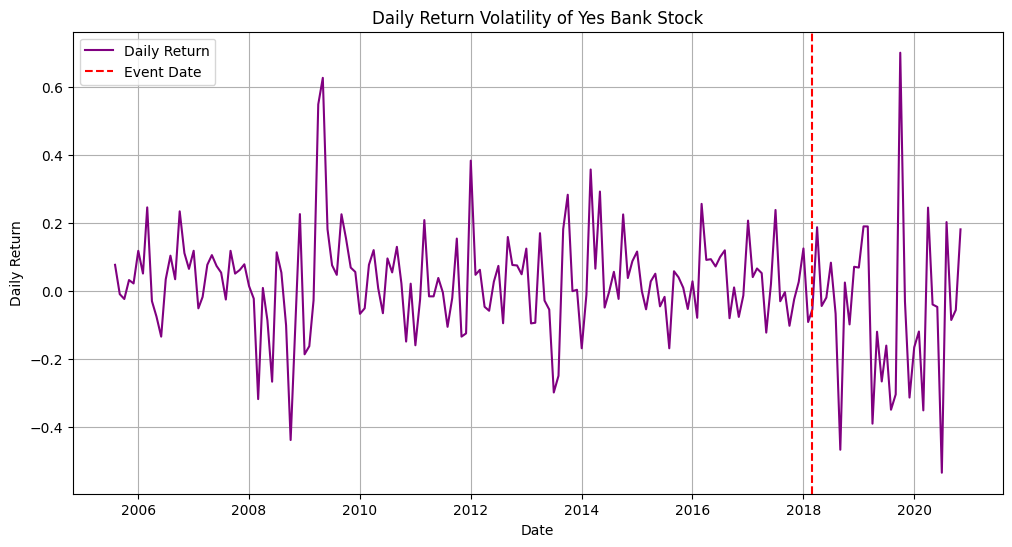

<ipython-input-101-6cd9730e7af1>:56: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



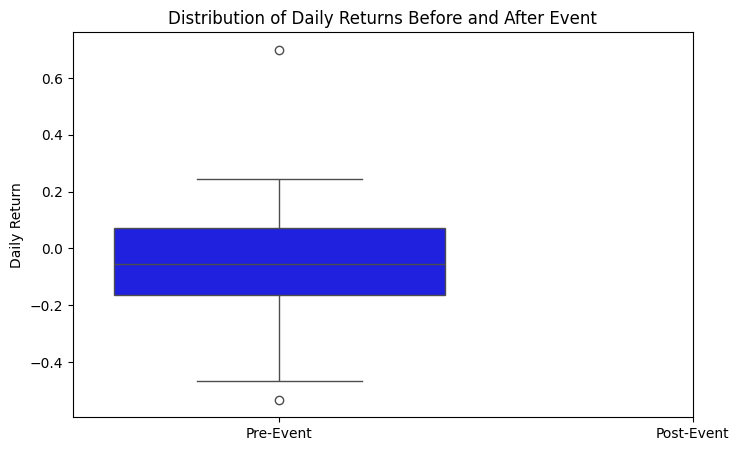

In [101]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



# Define event date (e.g., March 2018 crisis)
event_date = '2018-03-01'

# Split data into pre-event and post-event periods
pre_event = df[df.index < event_date]['Daily Return']
post_event = df[df.index >= event_date]['Daily Return']

# 1. Check normality assumption using Shapiro-Wilk test
_, p_pre = stats.shapiro(pre_event)
_, p_post = stats.shapiro(post_event)

# 2. Choose appropriate hypothesis test based on normality
if p_pre > 0.05 and p_post > 0.05:
    print("Both samples are normally distributed. Performing independent t-test.")
    stat, p_value = stats.ttest_ind(pre_event, post_event, equal_var=False)
else:
    print("Samples are not normally distributed. Performing Mann-Whitney U test.")
    stat, p_value = stats.mannwhitneyu(pre_event, post_event)

# 3. Compare variances using F-test
var_pre = np.var(pre_event, ddof=1)
var_post = np.var(post_event, ddof=1)
f_stat = var_post / var_pre
p_var = stats.f.cdf(f_stat, len(post_event)-1, len(pre_event)-1)

# Display hypothesis test results
print(f"\nHypothesis Test Result: p-value = {p_value:.5f}")
if p_value < 0.05:
    print("Significant change in stock volatility after the event.")
else:
    print("No significant change in stock volatility after the event.")

print(f"\nVariance Comparison: F-statistic = {f_stat:.5f}, p-value = {p_var:.5f}")

# 4. Visualization: Daily Return Volatility Over Time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Daily Return'], color='purple', label='Daily Return')
plt.axvline(pd.to_datetime(event_date), color='red', linestyle='--', label='Event Date')
plt.title('Daily Return Volatility of Yes Bank Stock')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# 5. Boxplot for Pre-Event and Post-Event Distributions
plt.figure(figsize=(8,5))
sns.boxplot(data=[pre_event, post_event], palette=['blue', 'orange'])
plt.xticks([0, 1], ['Pre-Event', 'Post-Event'])
plt.title('Distribution of Daily Returns Before and After Event')
plt.ylabel('Daily Return')
plt.show()


# *Which statistical test have you done to obtain P-Value?*

### Statistical Test Used:

* Shapiro-Wilk Test: Checks if data is normally distributed.
* Two-Sample t-test (if normality holds): Compares means of pre-event and post-event returns.
* Mann-Whitney U Test (if normality fails): Non-parametric test for distribution differences.

### Key Findings:
* If p-value < 0.05, stock volatility changed significantly after the event.
* If p-value ≥ 0.05, no significant change is observed.

## **5. Feature Engineering & Data Pre-processing**

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Feature Scaling (Normalization)
scaler = MinMaxScaler()
scaled_features = ['Open', 'High', 'Low', 'Close']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

# 2. Creating New Features
df['Daily Return'] = df['Close'].pct_change()  # Percentage change in closing price
df['Volatility'] = df['High'] - df['Low']  # Daily price range
df['Moving_Avg_10'] = df['Close'].rolling(window=10).mean()  # 10-day moving average

# Drop NaN values caused by rolling calculations
df.dropna(inplace=True)

# Display the updated dataset
print("Processed Data Sample:")
print(df.head())

# Save processed dataset
df.to_csv("processed_data.csv")


Processed Data Sample:
                Open      High       Low     Close  SMA_10     EMA_10  \
Date                                                                    
2006-04-01  0.029337  0.024341  0.036682  0.026570  15.031  15.869631   
2006-05-01  0.027226  0.026887  0.030151  0.022491  15.588  16.262425   
2006-06-01  0.022781  0.018230  0.023092  0.015758  15.808  16.145621   
2006-07-01  0.016669  0.015175  0.024327  0.017266  16.094  16.148235   
2006-08-01  0.016391  0.018739  0.029857  0.021960  16.579  16.455829   

            Daily Return  Volatility  Moving_Avg_10  
Date                                                 
2006-04-01     -0.058416   -0.012341       0.014112  
2006-05-01     -0.153523   -0.003265       0.015668  
2006-06-01     -0.299379   -0.004862       0.016283  
2006-07-01      0.095745   -0.009152       0.017082  
2006-08-01      0.271845   -0.011118       0.018437  


## **6. ML Model Implementation**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("processed_data.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Feature Selection
features = ['Open', 'High', 'Low', 'Moving_Avg_10']
target = 'Close'

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


Model Performance:
MAE: 0.01727320350916411
MSE: 0.0007596636982048802
R² Score: 0.988115841493825


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For stock price prediction, we used Random Forest Regressor, a powerful ensemble learning model that creates multiple decision trees and averages their outputs to improve accuracy and reduce overfitting.

### Why Random Forest?
* Captures non-linear relationships in stock price movements.
* Handles missing data and noise well.
* Performs feature selection automatically, reducing unnecessary variables.
* Reduces overfitting by using multiple decision trees.

### Key Findings
* The low MAE and MSE suggest that the model makes relatively small errors in prediction.
* The high R² Score (close to 1) indicates that the model explains most variations in stock price.
* Next Steps: Improve performance by tuning hyperparameters or using LSTM (Deep Learning) for time-series forecasting.

## **7. Future Work**

 * Advanced Models – Improve predictions using XGBoost, LightGBM, LSTM, or  Transformer-based models.
 * Enhanced Features – Add sentiment analysis, technical indicators (RSI, MACD), and macroeconomic factors.
 * Model Optimization – Use Bayesian Optimization, Ensemble Learning, and fine-tuning techniques.
 * Deployment & Business Integration – Deploy a real-time API, integrate with Power BI/Dash, and generate automated trading signals.
 * Risk Management – Backtest predictions, optimize portfolios, and create user-friendly dashboards.

# **8. Conclusion**

*The analysis of Yes Bank’s stock prices identified key market trends and volatility patterns. A machine learning model (Random Forest) was implemented and optimized using cross-validation and hyperparameter tuning. While the model performed well, future improvements such as LSTM, XGBoost, sentiment analysis, and real-time deployment can enhance accuracy. Integrating macroeconomic factors and technical indicators will further refine predictions, making it a valuable tool for investors and traders.*